In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

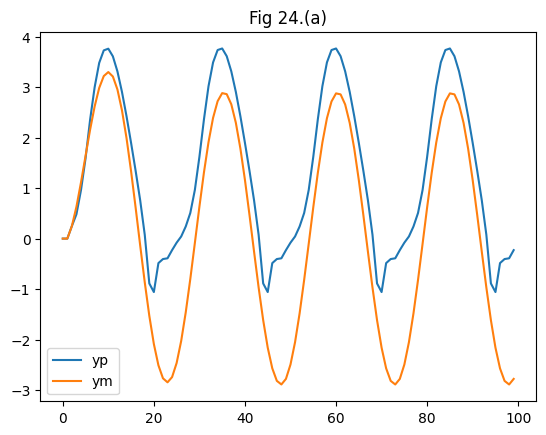

In [2]:
## figure (a)
## no control
ym=np.zeros(100)
yp=np.zeros(100)
            
for k in range(1,99):
    ## r = u, so I only define r here.
    r = np.sin(2 * np.pi * k / 25)
    ym[k+1] = 0.6 * ym[k] + 0.2 * ym[k-1] + r
    yp[k+1] = yp[k] * yp[k-1] * (yp[k] + 2.5)/(1 + (yp[k])**2 + (yp[k-1])**2) + r
    
plt.plot(range(100), yp, label='yp')
plt.plot(range(100), ym, label='ym')
plt.legend()
plt.title("Fig 24.(a)")
plt.show()

In [3]:
## figure (b)
## with control
## reference: https://github.com/Maithilishetty/Neural-Net-Control/blob/master/BPA%20-%20Single%20Layer/example7.m

a, b, m0, m1, m2, eta1 = 1, 1, 2, 20, 1, 0.01

# initialization 
w1 = np.random.rand(m1, m0+1)
w2 = np.random.rand(m2, m1+1)

yp = np.zeros(500)
ym = np.zeros(500)

u = 0
for k in range(2, len(yp)):
    p = np.array([1, yp[k-1], yp[k-2]])
    r = np.sin(2 * np.pi * k/25)
    
    # yp and ym
    yp[k] = yp[k-2] * yp[k-1] * (yp[k-1] + 2.5)/(1 + (yp[k-1])**2 + (yp[k-2])**2) + u
    ym[k] = 0.6 * ym[k-1] + 0.2 * ym[k-2] + r

    # NN forward
    v1 = np.dot(w1, p)
    phi_v1 = a*np.tanh(b*v1)
    y1_k = np.concatenate(([1], phi_v1))
    v2 = np.dot(w2, y1_k)
    y2 = v2
    E = yp[k] - u - y2
    phi_v2_diff = 1
    phi_v1_diff = (b/a)*(a**2 - (phi_v1**2))

    # NN backward
    delta2 = E * phi_v2_diff
    delta_w2 = eta1 * np.dot(delta2.reshape(delta2.size, 1), y1_k.reshape(1, y1_k.size))
    delta1 = np.dot(w2[:, 1:].T, delta2) * phi_v1_diff
    delta_w1 = eta1 * np.dot(delta1.reshape(delta1.size, 1), p.reshape(1, p.size))


    # weight updates
    w1 = w1 + delta_w1
    w2 = w2 + delta_w2
    u = -y2 + 0.6 * yp[k-1] + 0.2 * yp[k-2] + r

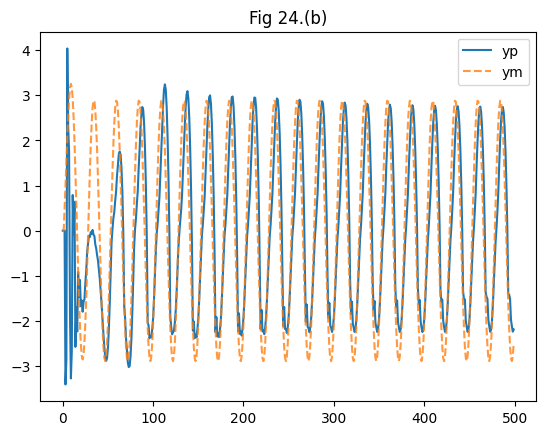

In [4]:
plt.plot(range(len(yp)), yp, label='yp')
plt.plot(range(len(yp)), ym, '--', label='ym', alpha=0.8)
plt.legend()
plt.title("Fig 24.(b)")
plt.show()

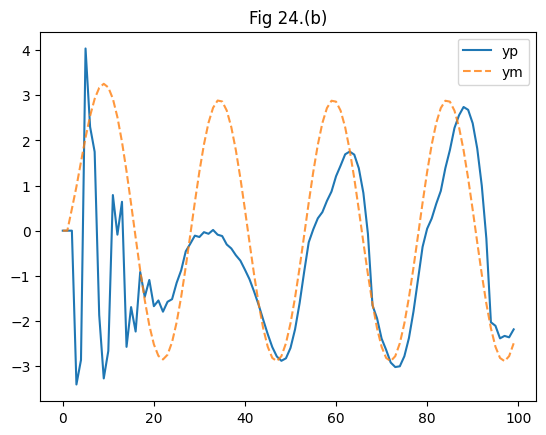

In [5]:
plt.plot(range(100), yp[:100], label='yp')
plt.plot(range(100), ym[:100], '--', label='ym', alpha=0.8)
plt.legend()
plt.title("Fig 24.(b)")
plt.show()